#Import Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings("ignore")

In [109]:
# Load data from CSV file
df = pd.read_csv('/content/data_company.csv')

# 1. Exploratory Data Analysis (EDA)
# Print basic information about the dataset to understand its structure
print("Basic dataset information:")
print(df.info())


Basic dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   floa

In [110]:
# Print the distribution of the 'Bankrupt?' label to check for class imbalance
print("\nDistribution of 'Bankrupt?' label:")
print(df['Bankrupt?'].value_counts(normalize=True))


Distribution of 'Bankrupt?' label:
Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [112]:
# Check for missing values in the dataset
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [115]:
# Display the first 5 rows to inspect the data
print("\nFirst 5 rows of the dataset:")
df.head(5)


First 5 rows of the dataset:


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [116]:
# Display the last 5 rows to inspect the data
print("\nLast 5 rows of the dataset:")
df.tail(5)


Last 5 rows of the dataset:


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [118]:
# Print summary statistics to understand the data's numerical properties
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# Exploratory Data Analysis

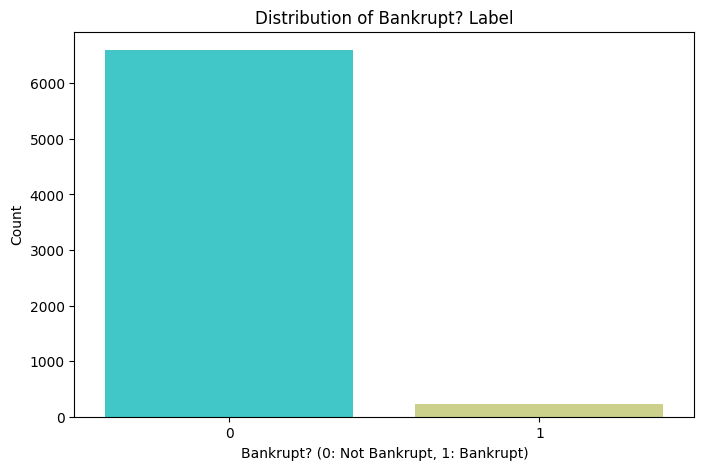

In [119]:
# Visualize the distribution of the 'Bankrupt?' label using a countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Bankrupt?', palette='rainbow')
plt.title('Distribution of Bankrupt? Label')
plt.xlabel('Bankrupt? (0: Not Bankrupt, 1: Bankrupt)')
plt.ylabel('Count')
plt.show()

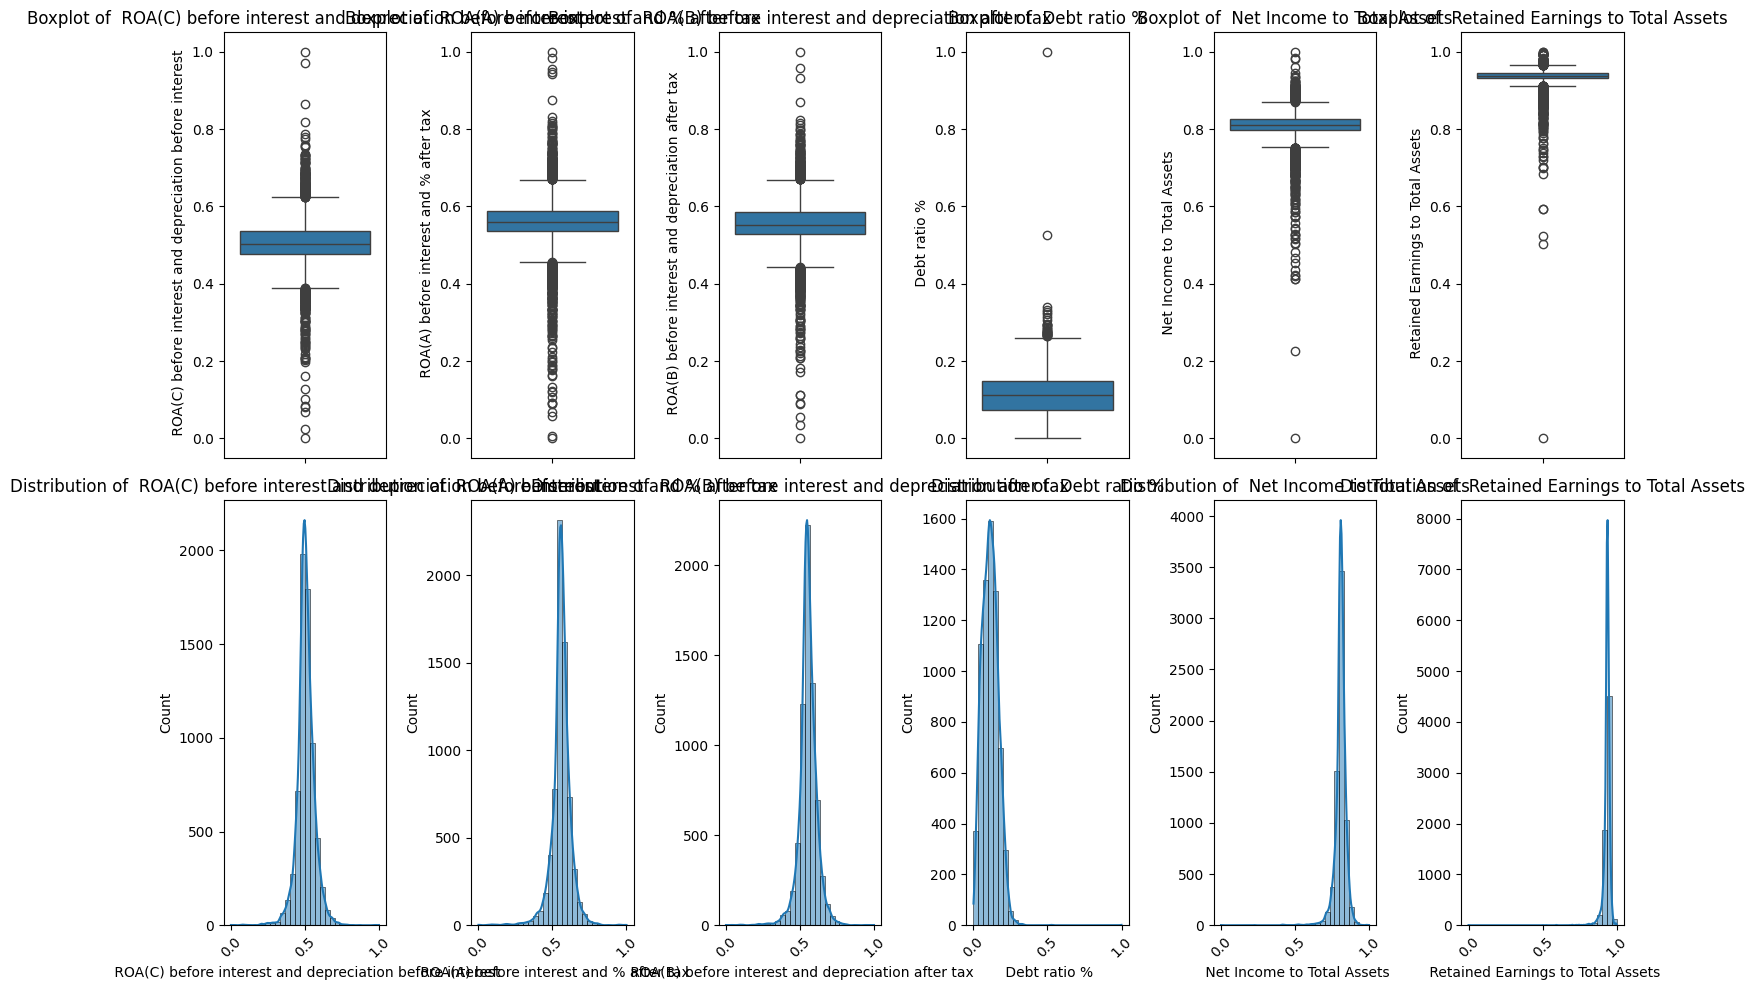

In [120]:
# Visualize key features using boxplots and histograms to check distribution and outliers
selected_columns = [
    ' ROA(C) before interest and depreciation before interest',
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' Debt ratio %',
    ' Net Income to Total Assets',
    ' Retained Earnings to Total Assets'
]
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns, 1):
    # Boxplot to check for outliers and spread
    plt.subplot(2, 6, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)
    # Histogram to visualize distribution and density
    plt.subplot(2, 6, i + 6)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

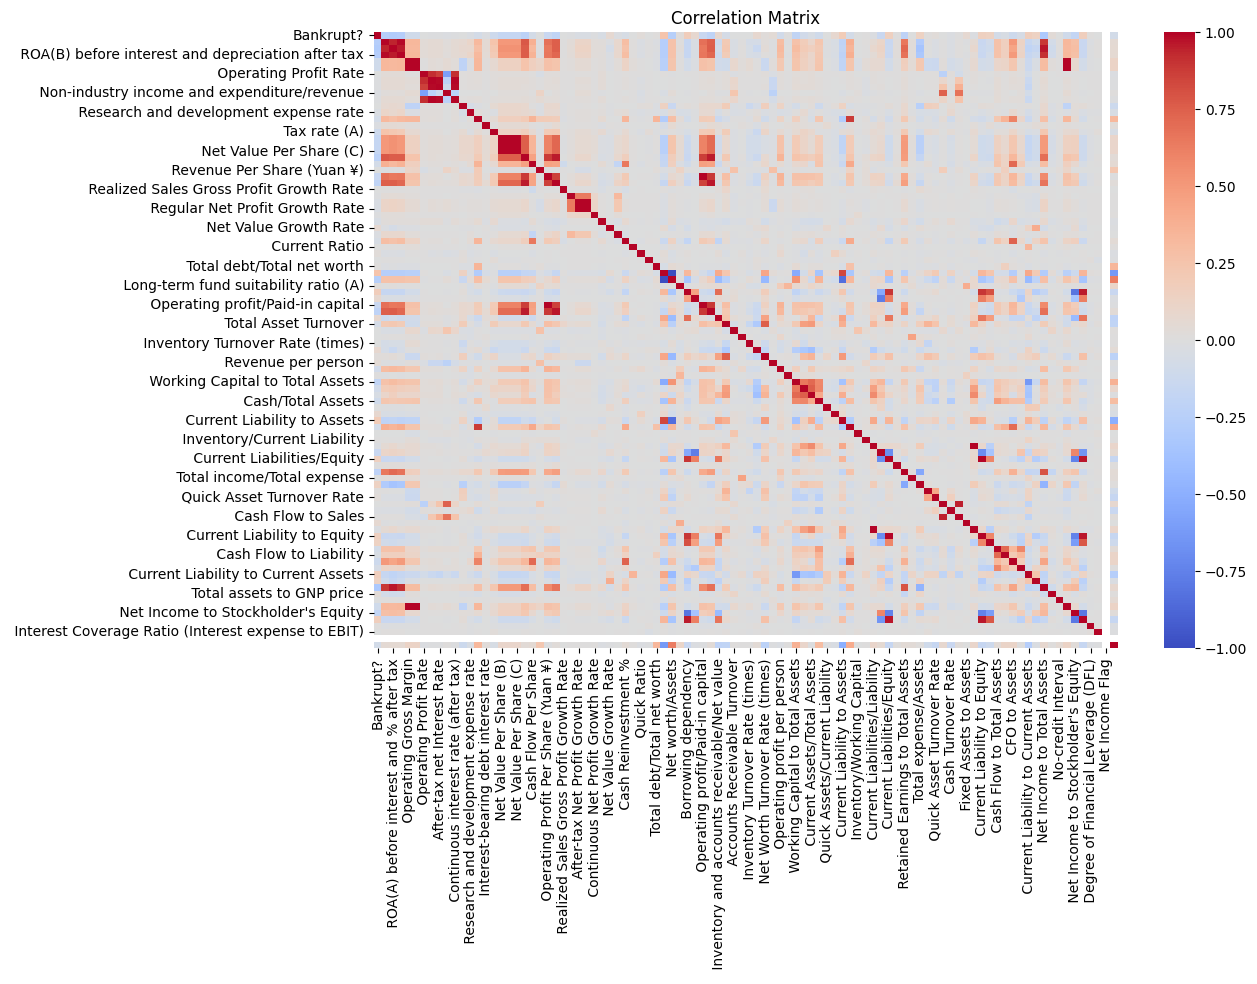

In [122]:
# Correlation analysis
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

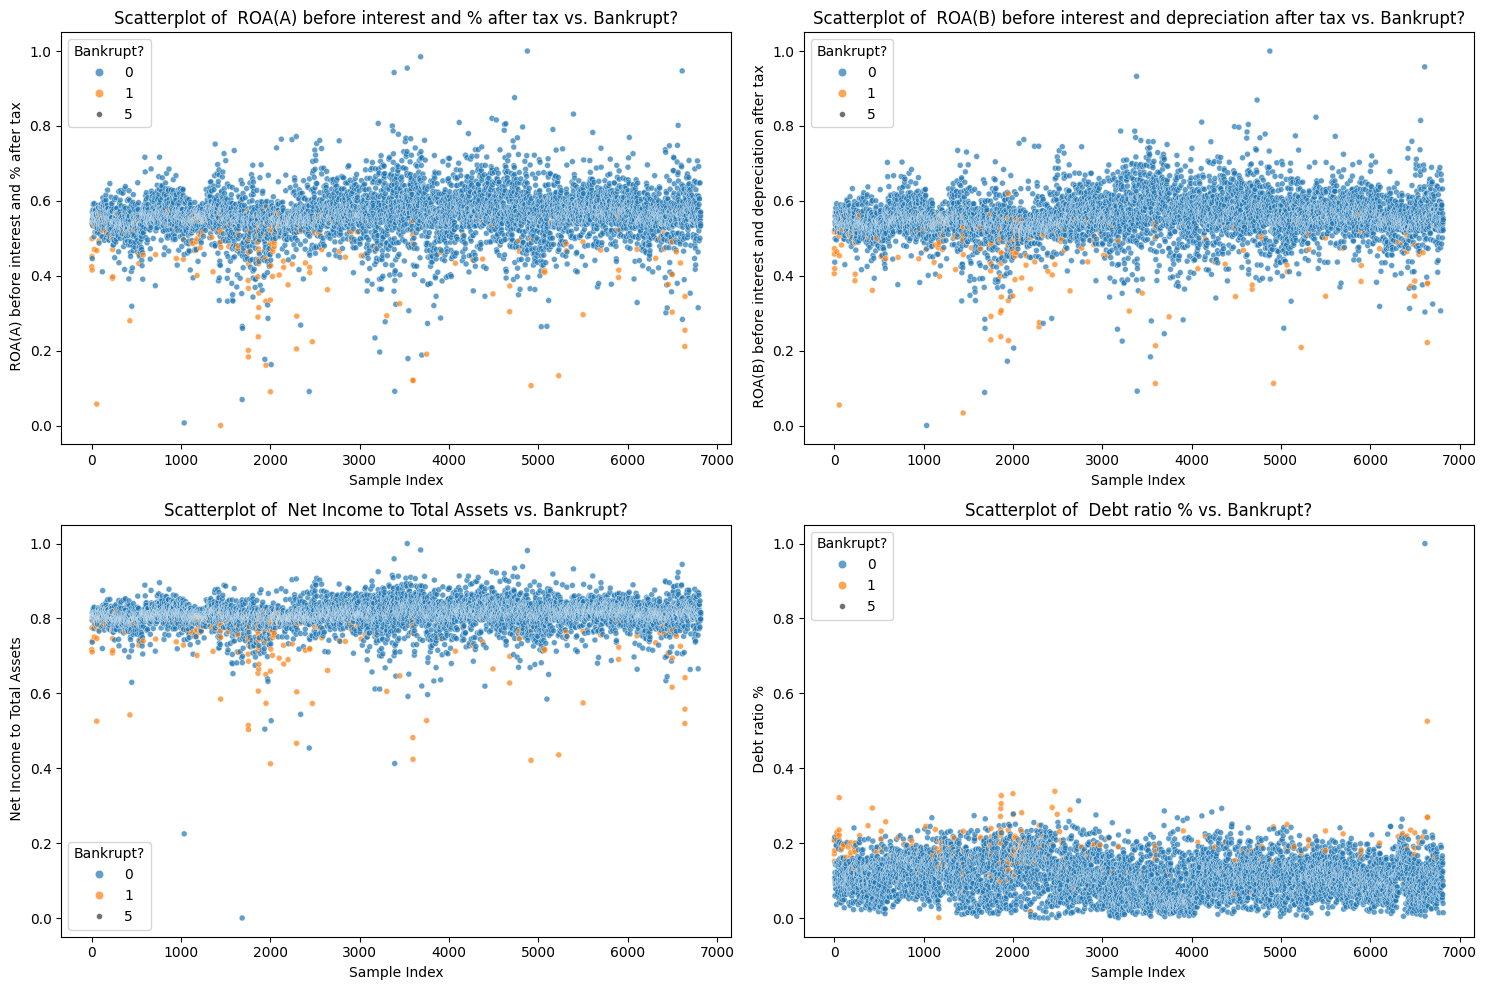

In [121]:
# Visualize relationships between key features and 'Bankrupt?' label using scatterplots
plt.figure(figsize=(15, 10))
scatter_columns = [
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' Net Income to Total Assets',
    ' Debt ratio %'
]
for i, col in enumerate(scatter_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=df.index, y=col, hue='Bankrupt?', alpha=0.7, size=5)
    plt.title(f'Scatterplot of {col} vs. Bankrupt?')
    plt.xlabel('Sample Index')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

#Data Preprocessing

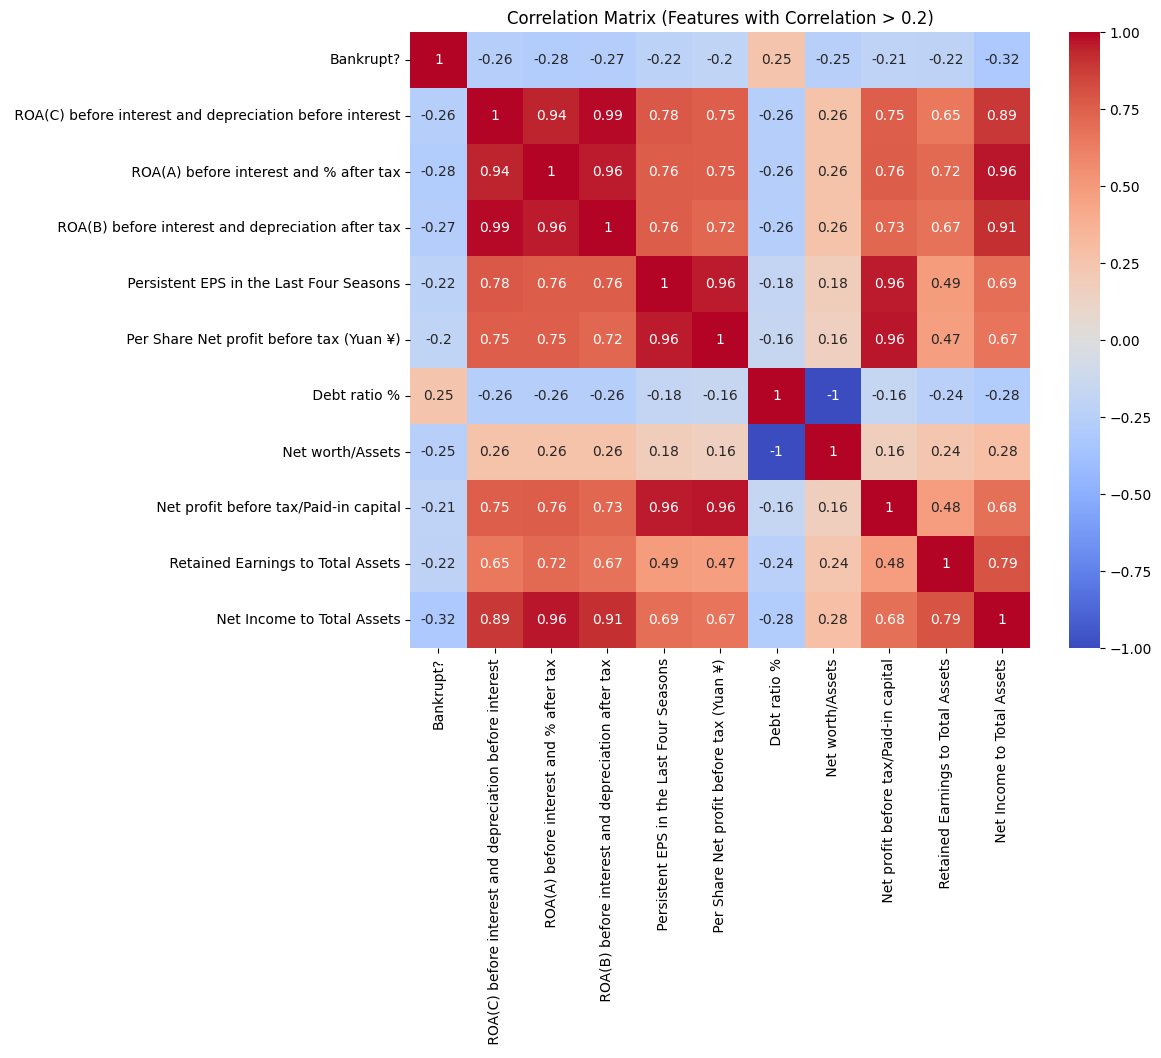

In [124]:
# 2. Data Preprocessing
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# --- Approach 1: Dimensionality Reduction Using Correlation ---
# Select features with absolute correlation to 'Bankrupt?' greater than 0.2
thres = 0.2
fil_cols = [col for col in df.columns if abs(df.corr()['Bankrupt?'][col]) > thres]
df_filt = df[fil_cols]

# Visualize the correlation matrix for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(df_filt.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix (Features with Correlation > 0.2)')
plt.show()

In [125]:
# Standardize the data for Approach 1
scaler_corr = StandardScaler()
X_corr = df_filt.drop('Bankrupt?', axis=1)
y_corr = df_filt['Bankrupt?']
X_corr_scaled = scaler_corr.fit_transform(X_corr)
X_corr_scaled = pd.DataFrame(X_corr_scaled, columns=X_corr.columns, index=X_corr.index)

# Address class imbalance using SMOTE to balance the dataset
smote = SMOTE(random_state=42, sampling_strategy=1.0)
X_corr_resampled, y_corr_resampled = smote.fit_resample(X_corr_scaled, y_corr)

# Split the data into training and testing sets
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr_resampled, y_corr_resampled, test_size=0.3, random_state=101)


In [127]:
# --- Approach 2: Dimensionality Reduction Using PCA ---
# Drop 'Net Income Flag' as it has only one unique value
df_pca = df.drop(' Net Income Flag', axis=1)
X_pca = df_pca.drop('Bankrupt?', axis=1)
y_pca = df_pca['Bankrupt?']

# Standardize the data for PCA
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)
X_pca_scaled = pd.DataFrame(X_pca_scaled, columns=X_pca.columns, index=X_pca.index)

# Apply PCA with 10 components
pca = PCA(n_components=10)
X_pca_transformed = pca.fit_transform(X_pca_scaled)

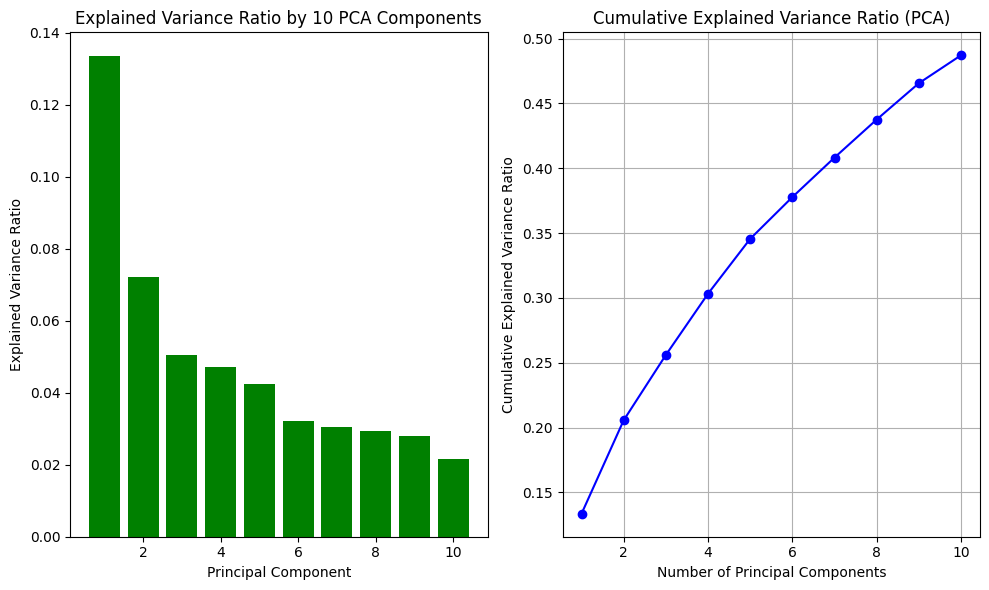


Total explained variance ratio by 10 PCA components: 0.4872


In [128]:
# Visualize explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, 11), pca.explained_variance_ratio_, color='green')
plt.title('Explained Variance Ratio by 10 PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='blue')
plt.title('Cumulative Explained Variance Ratio (PCA)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"\nTotal explained variance ratio by 10 PCA components: {sum(pca.explained_variance_ratio_):.4f}")

# Address class imbalance using SMOTE for PCA data
X_pca_resampled, y_pca_resampled = smote.fit_resample(X_pca_transformed, y_pca)

# Split the PCA data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_resampled, y_pca_resampled, test_size=0.3, random_state=101)


#Training model and Evaluation

In [129]:
# 3. Model Training and Evaluation
# Define models with parameters to handle class imbalance
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': xgb.XGBClassifier(random_state=42, scale_pos_weight=1),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced')
}

# Initialize dataframes to store evaluation metrics
results_corr = pd.DataFrame(index=models.keys(), columns=['F1 score', 'Accuracy', 'Recall', 'Precision'])
results_pca = pd.DataFrame(index=models.keys(), columns=['F1 score', 'Accuracy', 'Recall', 'Precision'])
matrices_corr = []
matrices_pca = []
predictions_summary_corr = []
predictions_summary_pca = []

In [130]:
# Train and evaluate models for Approach 1 (Correlation-based)
print("\n=== Approach 1: Correlation-based ===")
for name, model in models.items():
    model.fit(X_train_corr, y_train_corr)
    y_pred = model.predict(X_test_corr)
    y_pred_proba = model.predict_proba(X_test_corr)[:, 1] if hasattr(model, 'predict_proba') else None
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test_corr, y_pred))
    if y_pred_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test_corr, y_pred_proba)}")
    results_corr.loc[name, 'F1 score'] = float(f1_score(y_test_corr, y_pred))
    results_corr.loc[name, 'Accuracy'] = float(accuracy_score(y_test_corr, y_pred))
    results_corr.loc[name, 'Recall'] = float(recall_score(y_test_corr, y_pred))
    results_corr.loc[name, 'Precision'] = float(precision_score(y_test_corr, y_pred))
    matrices_corr.append(confusion_matrix(y_test_corr, y_pred))
    predictions_summary_corr.append(y_pred)

# Print confusion matrices for Approach 1
for name, matrix in zip(models.keys(), matrices_corr):
    print(f"\n{name} - Confusion Matrix (Correlation):")
    print(matrix)


=== Approach 1: Correlation-based ===

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1965
           1       0.86      0.88      0.87      1995

    accuracy                           0.87      3960
   macro avg       0.87      0.87      0.87      3960
weighted avg       0.87      0.87      0.87      3960

ROC-AUC: 0.938330049041178

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1965
           1       0.95      0.98      0.96      1995

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960

ROC-AUC: 0.9935903371660704

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1965
           1       0.93

In [131]:
# Train and evaluate models for Approach 2 (PCA)
print("\n=== Approach 2: PCA ===")
for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    y_pred = model.predict(X_test_pca)
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1] if hasattr(model, 'predict_proba') else None
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test_pca, y_pred))
    if y_pred_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test_pca, y_pred_proba)}")
    results_pca.loc[name, 'F1 score'] = float(f1_score(y_test_pca, y_pred))
    results_pca.loc[name, 'Accuracy'] = float(accuracy_score(y_test_pca, y_pred))
    results_pca.loc[name, 'Recall'] = float(recall_score(y_test_pca, y_pred))
    results_pca.loc[name, 'Precision'] = float(precision_score(y_test_pca, y_pred))
    matrices_pca.append(confusion_matrix(y_test_pca, y_pred))
    predictions_summary_pca.append(y_pred)

# Print confusion matrices for Approach 2
for name, matrix in zip(models.keys(), matrices_pca):
    print(f"\n{name} - Confusion Matrix (PCA):")
    print(matrix)


=== Approach 2: PCA ===

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1965
           1       0.86      0.88      0.87      1995

    accuracy                           0.87      3960
   macro avg       0.87      0.87      0.87      3960
weighted avg       0.87      0.87      0.87      3960

ROC-AUC: 0.9294406499709835

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1965
           1       0.95      0.98      0.97      1995

    accuracy                           0.96      3960
   macro avg       0.97      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960

ROC-AUC: 0.9949136199276818

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1965
           1       0.94      0.99   

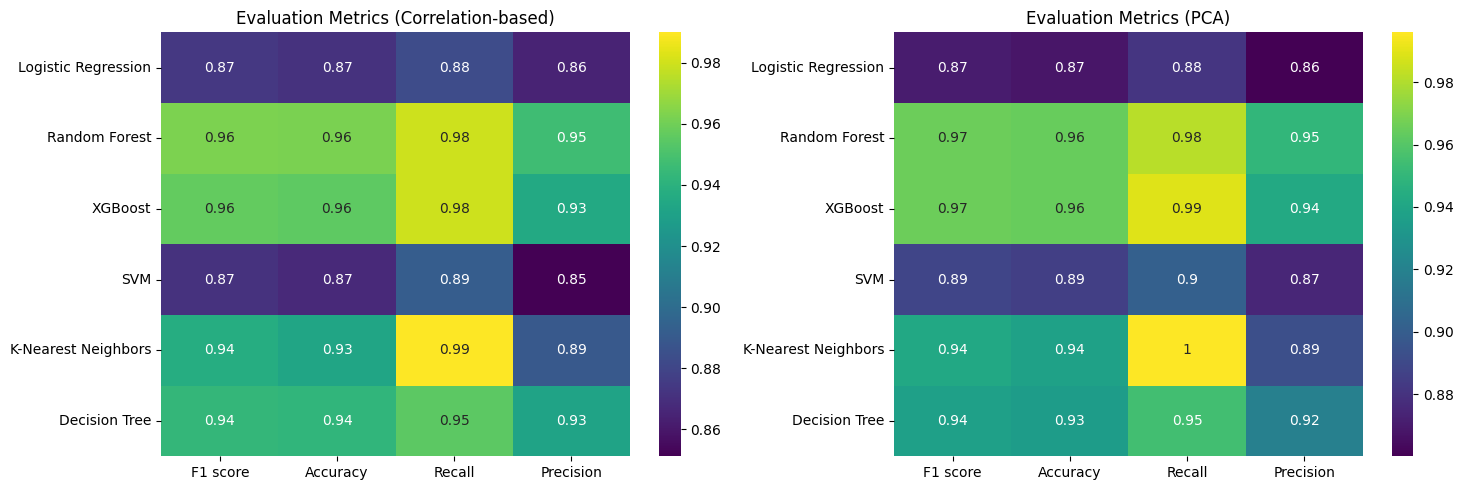

In [132]:
# Visualize evaluation metrics using heatmaps
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(results_corr.astype(float), cmap='viridis', annot=True)
plt.title('Evaluation Metrics (Correlation-based)')
plt.subplot(1, 2, 2)
sns.heatmap(results_pca.astype(float), cmap='viridis', annot=True)
plt.title('Evaluation Metrics (PCA)')
plt.tight_layout()
plt.show()

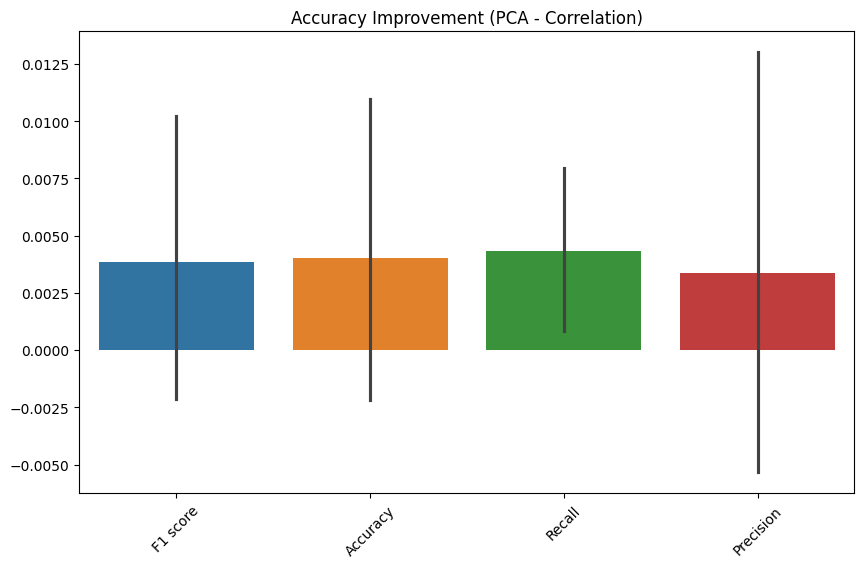

In [133]:
# Compare accuracy improvement between PCA and Correlation-based approaches
improvement = results_pca - results_corr
plt.figure(figsize=(10, 6))
sns.barplot(data=improvement.astype(float))
plt.title('Accuracy Improvement (PCA - Correlation)')
plt.xticks(rotation=45)
plt.show()

In [134]:
# Check prediction distribution for Random Forest on test set
print("\nPrediction distribution on test set (Random Forest, Correlation):")
print(pd.Series(predictions_summary_corr[1]).value_counts(normalize=True))
print("\nPrediction distribution on test set (Random Forest, PCA):")
print(pd.Series(predictions_summary_pca[1]).value_counts(normalize=True))


Prediction distribution on test set (Random Forest, Correlation):
1    0.521212
0    0.478788
Name: proportion, dtype: float64

Prediction distribution on test set (Random Forest, PCA):
1    0.520707
0    0.479293
Name: proportion, dtype: float64


In [135]:
# 4. Feature Importance Analysis
# --- Approach 1: Correlation-based ---
feature_importance_dict_corr = {}
rf_model_corr = models['Random Forest']
importances_rf_corr = rf_model_corr.feature_importances_
feature_importance_dict_corr['Random Forest'] = pd.DataFrame({'feature': X_corr.columns, 'importance': importances_rf_corr})

xgb_model_corr = models['XGBoost']
importances_xgb_corr = xgb_model_corr.feature_importances_
feature_importance_dict_corr['XGBoost'] = pd.DataFrame({'feature': X_corr.columns, 'importance': importances_xgb_corr})

dt_model_corr = models['Decision Tree']
importances_dt_corr = dt_model_corr.feature_importances_
feature_importance_dict_corr['Decision Tree'] = pd.DataFrame({'feature': X_corr.columns, 'importance': importances_dt_corr})

lr_model_corr = models['Logistic Regression']
importances_lr_corr = np.abs(lr_model_corr.coef_[0])
feature_importance_dict_corr['Logistic Regression'] = pd.DataFrame({'feature': X_corr.columns, 'importance': importances_lr_corr})


Top 10 features for Random Forest (Correlation):
                                             feature  importance
0   ROA(C) before interest and depreciation befor...    0.462861
9                         Net Income to Total Assets    0.125158
5                                       Debt ratio %    0.072143
1             ROA(A) before interest and % after tax    0.061713
7              Net profit before tax/Paid-in capital    0.051518
2   ROA(B) before interest and depreciation after...    0.050549
3            Persistent EPS in the Last Four Seasons    0.047065
8                  Retained Earnings to Total Assets    0.046010
6                                   Net worth/Assets    0.043058
4           Per Share Net profit before tax (Yuan ¥)    0.039925

Top 10 features for XGBoost (Correlation):
                                             feature  importance
0   ROA(C) before interest and depreciation befor...    0.499245
1             ROA(A) before interest and % after tax    0.078

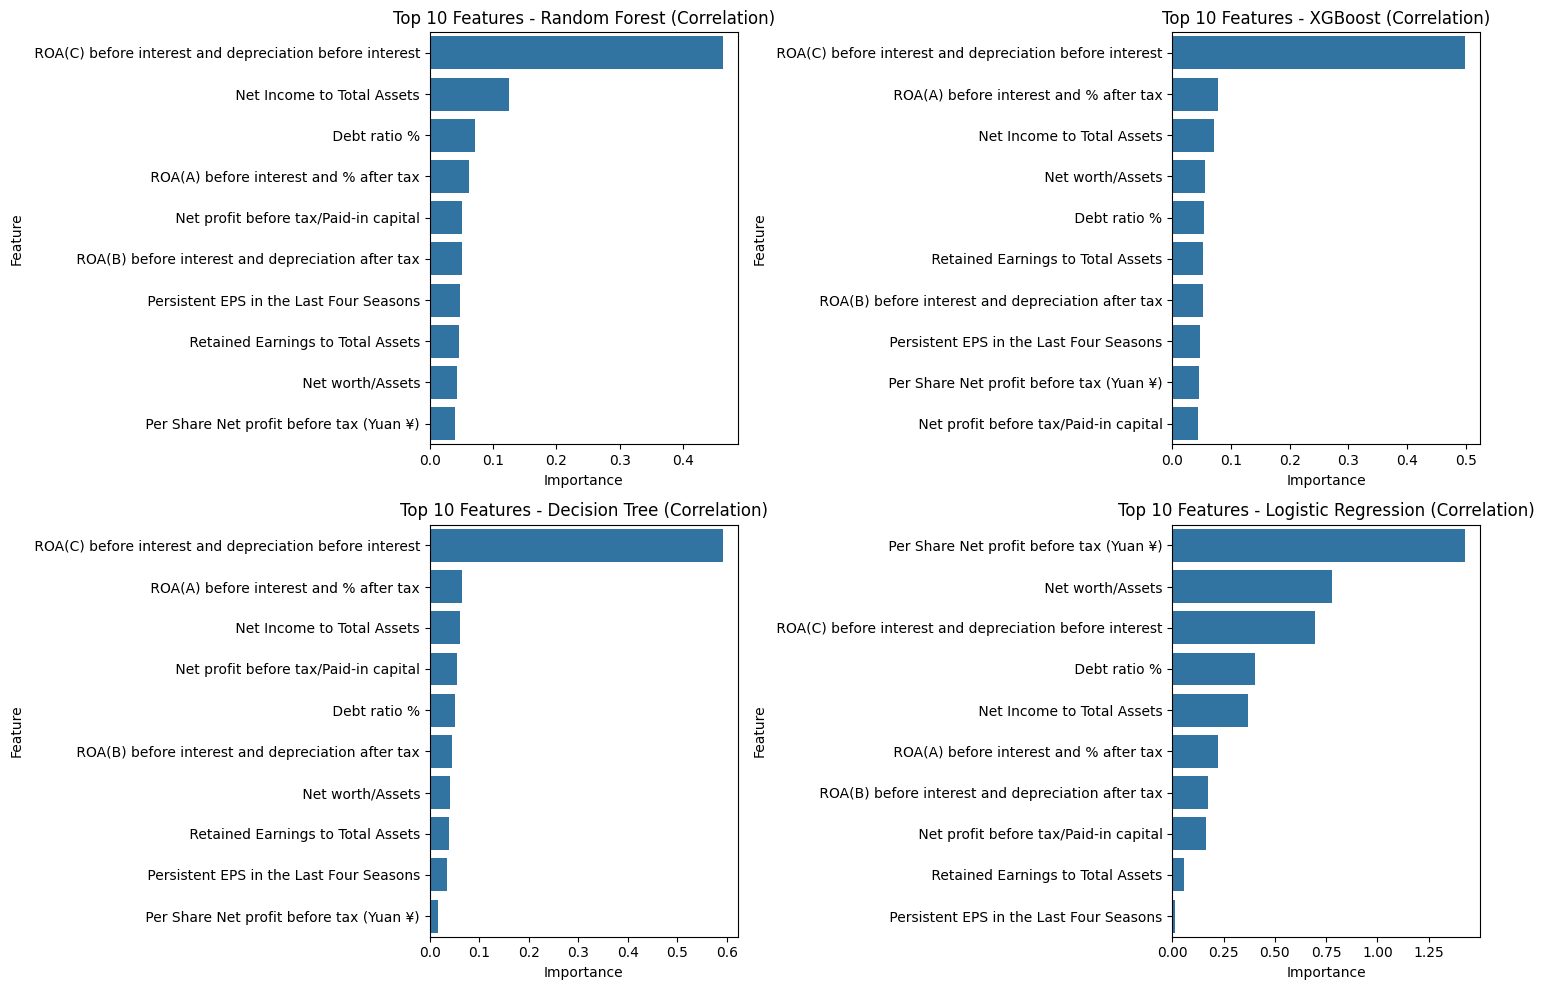

In [136]:
# Visualize top 10 features for each model in Approach 1
plt.figure(figsize=(15, 10))
for i, (name, importance_df) in enumerate(feature_importance_dict_corr.items(), 1):
    importance_df = importance_df.sort_values('importance', ascending=False)
    print(f"\nTop 10 features for {name} (Correlation):")
    print(importance_df.head(10))

    plt.subplot(2, 2, i)
    sns.barplot(x='importance', y='feature', data=importance_df.head(10))
    plt.title(f'Top 10 Features - {name} (Correlation)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Top 10 PCA components (Random Forest):
  feature  importance
0     PC1    0.462861
9    PC10    0.125158
5     PC6    0.072143
1     PC2    0.061713
7     PC8    0.051518
2     PC3    0.050549
3     PC4    0.047065
8     PC9    0.046010
6     PC7    0.043058
4     PC5    0.039925


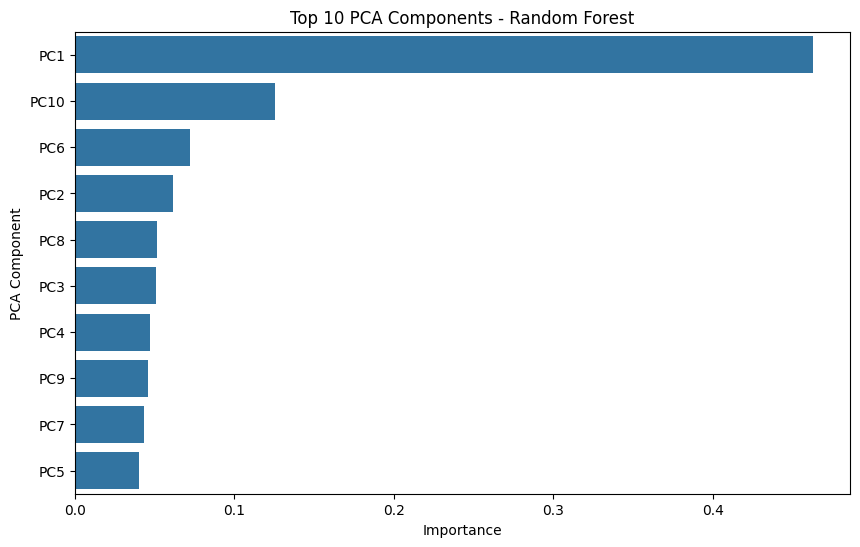

In [137]:
# --- Approach 2: PCA ---
# Analyze the importance of PCA components using Random Forest
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_pca.fit(X_train_pca, y_train_pca)
importances_rf_pca = rf_model_pca.feature_importances_
feature_importance_pca = pd.DataFrame({'feature': [f'PC{i+1}' for i in range(10)], 'importance': importances_rf_pca})
feature_importance_pca = feature_importance_pca.sort_values('importance', ascending=False)

print("\nTop 10 PCA components (Random Forest):")
print(feature_importance_pca.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_pca.head(10))
plt.title('Top 10 PCA Components - Random Forest')
plt.xlabel('Importance')
plt.ylabel('PCA Component')
plt.show()

# Prediction on Data Sample

In [146]:
# 5. Prediction on 2 Random Samples from Original Data
# Set random seed for reproducibility to ensure consistent sample selection
np.random.seed(42)
random_indices = np.random.choice(df.shape[0], size=2, replace=False)

# --- Approach 1: Correlation-based ---
# Select features for the random samples and standardize them using the scaler trained on correlation-based data
samples_corr = df[fil_cols].drop('Bankrupt?', axis=1).iloc[random_indices]
samples_corr_scaled = scaler_corr.transform(samples_corr)

# --- Approach 2: PCA ---
# Select features for PCA, standardize, and transform using the PCA model
samples_pca = df.drop(' Net Income Flag', axis=1).drop('Bankrupt?', axis=1).iloc[random_indices]
samples_pca_scaled = scaler_pca.transform(samples_pca)
samples_pca_transformed = pca.transform(samples_pca_scaled)

# Initialize lists to store prediction results
results_list = []

# Process predictions for both approaches (Correlation-based and PCA)
for approach, samples in [('Correlation-based', samples_corr_scaled), ('PCA', samples_pca_transformed)]:
    for name, model in models.items():
        for i, idx in enumerate(random_indices):
            # Get true label from the original dataset
            true_label = df['Bankrupt?'].iloc[idx]

            # Default prediction (threshold 0.5)
            sample_pred = model.predict(samples[i:i+1])[0]
            sample_pred_proba = model.predict_proba(samples[i:i+1])[:, 1][0] if hasattr(model, 'predict_proba') else None

            # Store default prediction
            result = {
                'Approach': approach,
                'Model': name,
                'Sample': i + 1,
                'Index': idx,
                'True Label': true_label,
                'Prediction': sample_pred,
                'Probability': sample_pred_proba if sample_pred_proba is not None else 'N/A'
            }
            results_list.append(result)

            # Prediction with threshold 0.3 to improve recall for class 1
            if hasattr(model, 'predict_proba'):
                sample_pred_proba = model.predict_proba(samples[i:i+1])[:, 1][0]
                sample_pred_threshold_03 = (sample_pred_proba >= 0.3).astype(int)
                result_threshold_03 = {
                    'Approach': f'{approach} (Threshold 0.3)',
                    'Model': name,
                    'Sample': i + 1,
                    'Index': idx,
                    'True Label': true_label,
                    'Prediction': sample_pred_threshold_03,
                    'Probability': sample_pred_proba
                }
                results_list.append(result_threshold_03)

                # Prediction with threshold 0.2 to further improve recall for class 1
                sample_pred_threshold_02 = (sample_pred_proba >= 0.2).astype(int)
                result_threshold_02 = {
                    'Approach': f'{approach} (Threshold 0.2)',
                    'Model': name,
                    'Sample': i + 1,
                    'Index': idx,
                    'True Label': true_label,
                    'Prediction': sample_pred_threshold_02,
                    'Probability': sample_pred_proba
                }
                results_list.append(result_threshold_02)

# Create DataFrame from results
results_df = pd.DataFrame(results_list)

# Pivot the DataFrame for a compact view, separating Prediction and Probability
pivot_df = results_df.pivot_table(
    index=['Sample', 'Index', 'True Label'],
    columns=['Approach', 'Model'],
    values=['Prediction', 'Probability'],
    aggfunc='first'
)

# Flatten the multi-index columns for readability
pivot_df.columns = [f'{col[0]}_{col[1]}_{col[2]}' for col in pivot_df.columns]
pivot_df = pivot_df.reset_index()

# Ensure all models (including SVM, Decision Tree, KNN) are explicitly included
expected_models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'K-Nearest Neighbors', 'Decision Tree']
for approach in ['Correlation-based', 'Correlation-based (Threshold 0.3)', 'Correlation-based (Threshold 0.2)',
                 'PCA', 'PCA (Threshold 0.3)', 'PCA (Threshold 0.2)']:
    for model in expected_models:
        for metric in ['Prediction', 'Probability']:
            col_name = f'{metric}_{approach}_{model}'
            if col_name not in pivot_df.columns:
                pivot_df[col_name] = np.nan

# Reorder columns to group by model for clarity
ordered_columns = ['Sample', 'Index', 'True Label']
for model in expected_models:
    for approach in ['Correlation-based', 'Correlation-based (Threshold 0.3)', 'Correlation-based (Threshold 0.2)',
                     'PCA', 'PCA (Threshold 0.3)', 'PCA (Threshold 0.2)']:
        ordered_columns.append(f'Prediction_{approach}_{model}')
        ordered_columns.append(f'Probability_{approach}_{model}')
pivot_df = pivot_df[ordered_columns]

In [147]:
# Save the DataFrame to CSV for further analysis
results_df.to_csv('predictions_2_samples.csv', index=False)
print("\nPredictions saved to 'predictions_2_samples.csv'")


Predictions saved to 'predictions_2_samples.csv'


In [148]:
# Display the consolidated DataFrame
print("\n=== Consolidated Predictions on 2 Random Samples ===")
results_df


=== Consolidated Predictions on 2 Random Samples ===


,Approach,Model,Sample,Index,True Label,Prediction,Probability
0,Correlation-based,Logistic Regression,1,239,0,0,0.009067
1,Correlation-based (Threshold 0.3),Logistic Regression,1,239,0,0,0.009067
2,Correlation-based (Threshold 0.2),Logistic Regression,1,239,0,0,0.009067
3,Correlation-based,Logistic Regression,2,2850,0,0,0.146129
4,Correlation-based (Threshold 0.3),Logistic Regression,2,2850,0,0,0.146129
...,...,...,...,...,...,...,...
67,PCA (Threshold 0.3),Decision Tree,1,239,0,0,0.000000
68,PCA (Threshold 0.2),Decision Tree,1,239,0,0,0.000000
69,PCA,Decision Tree,2,2850,0,0,0.000000
70,PCA (Threshold 0.3),Decision Tree,2,2850,0,0,0.000000


In [149]:
print("\n=== Pivoted Predictions for Compact View ===")
pivot_df


=== Pivoted Predictions for Compact View ===


,Sample,Index,True Label,Prediction_Correlation-based_Logistic Regression,Probability_Correlation-based_Logistic Regression,Prediction_Correlation-based (Threshold 0.3)_Logistic Regression,Probability_Correlation-based (Threshold 0.3)_Logistic Regression,Prediction_Correlation-based (Threshold 0.2)_Logistic Regression,Probability_Correlation-based (Threshold 0.2)_Logistic Regression,Prediction_PCA_Logistic Regression,...,Prediction_Correlation-based (Threshold 0.3)_Decision Tree,Probability_Correlation-based (Threshold 0.3)_Decision Tree,Prediction_Correlation-based (Threshold 0.2)_Decision Tree,Probability_Correlation-based (Threshold 0.2)_Decision Tree,Prediction_PCA_Decision Tree,Probability_PCA_Decision Tree,Prediction_PCA (Threshold 0.3)_Decision Tree,Probability_PCA (Threshold 0.3)_Decision Tree,Prediction_PCA (Threshold 0.2)_Decision Tree,Probability_PCA (Threshold 0.2)_Decision Tree
0,1,239,0,0,0.009067,0,0.009067,0,0.009067,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,2,2850,0,0,0.146129,0,0.146129,0,0.146129,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
